In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from plotly.offline import iplot
import plotly.express as px
import plotly.graph_objects as go
from pydicom import dcmread
from pydicom.data import get_testdata_file #To grab the DCIOM data
import pydicom
import imageio
import pylab
from IPython.display import Image
import warnings
import random
import matplotlib.image as mpimg
from skimage import measure
from PIL import Image

## Importing the data and exploitory data analysis

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


### Let's check what each column represents
- Patient : The ID of a patient admitted in hospital
- Weeks : The followup week of the Patient
- FVC :  the recorded lung capacity in milliliter
- Percent : a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics
- Age : Patients age
- Sex: Patients sex
- SmokingStatus : Smokes or not?

In [4]:
#Checking train dataframe info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [5]:
#Checking test dataframe info
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non-null      int64  
 5   Sex            5 non-null      object 
 6   SmokingStatus  5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes


In [6]:
# Statistical Analysis of train data
train_data.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [7]:
# Statistical Analysis of test data
test_data.describe()

,Weeks,FVC,Percent,Age
count,5.000000,5.000000,5.000000,5.000000
mean,8.800000,2781.600000,75.997702,71.800000
std,7.049823,516.475846,4.970960,2.167948
min,0.000000,1930.000000,70.186855,68.000000
25%,6.000000,2739.000000,71.824968,72.000000
50%,6.000000,2925.000000,76.672493,73.000000
75%,15.000000,3020.000000,79.258903,73.000000
max,17.000000,3294.000000,82.045291,73.000000


In [8]:
##Checking whether there is any empty values in both train and test dataset
train_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [9]:
test_data.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

- No null values present in both train and test set

In [10]:
train_data.groupby(['Sex','SmokingStatus'])['FVC'].agg(['mean','std','count']).sort_values(by=['Sex','count'],ascending=False)

mean         std  count
Sex    SmokingStatus                                   
Male   Ex-smoker         2886.024705  769.105923    931
       Never smoked      2878.034934  667.921434    229
       Currently smokes  3300.828125  694.108554     64
Female Never smoked      1775.985000  584.208226    200
       Ex-smoker         1901.906542  450.294485    107
       Currently smokes  2868.833333   71.124787     18

- FVC has the highest rate with the people that still smokes. However, because the data for the smoking is quite low, we can't really generalise that people who smoke has high FVC.

In [11]:
test_data.groupby(['Sex','SmokingStatus'])['FVC'].agg(['mean','std','count']).sort_values(by=['Sex','count'],ascending=False)

mean         std  count
Sex  SmokingStatus                            
Male Ex-smoker      2745.75  589.147619      4
     Never smoked   2925.00         NaN      1

### Counting the number of patients in both train and test set

In [12]:
#Train data
print('train_data patient count is : {}'.format(train_data['Patient'].count()))

train_data patient count is : 1549


In [13]:
#Test data
print('test_data patient count is : {}'.format(test_data['Patient'].count()))

test_data patient count is : 5


In [14]:
#Unique patient in training data
print('train_data unique patient count is : {}'.format(train_data['Patient'].nunique()))

train_data unique patient count is : 176


In [15]:
#Unique patient in testing data
print('test_data unique patient count is : {}'.format(test_data['Patient'].nunique()))

test_data unique patient count is : 5


#### Let's add frequency column in our train dataframe

In [16]:
patient_freq = train_data.groupby(['Patient'])['Patient'].count()

In [17]:
patient_freq = pd.DataFrame({'Patient':patient_freq.index,'Frequencies': patient_freq.values})

In [18]:
final_dataframe = pd.merge(train_data,patient_freq,how='inner',on = 'Patient')

In [19]:
#Final dataframe with added frequencies table
final_dataframe.sort_values(by='Frequencies',ascending = False)

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Frequencies
875,ID00229637202260254240583,23,3518,78.702461,71,Male,Ex-smoker,10
627,ID00167637202237397919352,13,4680,95.060123,58,Male,Ex-smoker,10
634,ID00167637202237397919352,66,3744,76.048099,58,Male,Ex-smoker,10
633,ID00167637202237397919352,62,4288,87.097823,58,Male,Ex-smoker,10
632,ID00167637202237397919352,47,4424,89.860253,58,Male,Ex-smoker,10
...,...,...,...,...,...,...,...,...
160,ID00047637202184938901501,2,3313,89.929425,68,Male,Ex-smoker,6
161,ID00047637202184938901501,4,3235,87.812161,68,Male,Ex-smoker,6
162,ID00047637202184938901501,6,3370,91.476656,68,Male,Ex-smoker,6
989,ID00267637202270790561585,3,1015,50.158134,70,Female,Never smoked,6


### Checking how many CT scans each patient recieved(Training)

In [20]:
train_directory = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'
patient_id = os.listdir(train_directory)
patient_id = sorted(patient_id)

cat_scan = []
for i in patient_id:
    cat_scan.append(len(os.listdir(train_directory+"\\" + i)))
    
catScan_df = pd.DataFrame({'Patient':patient_id,'ctScan_counts':cat_scan})

#Merging it into final dataframe with added catScan
train_final_dataframe = pd.merge(final_dataframe,catScan_df,how='inner',on = 'Patient')

### Creating patient dataframe by removing duplicates in the original final dataframe for further data exploration 

In [21]:
#Dropping the duplicates and creating new dataframe
train_patient_dataframe = train_final_dataframe.drop_duplicates(subset = 'Patient').reset_index(drop=True)

In [22]:
#Maximum number of CT scan 
print('Maximum number of CT scan taken by one patient is : {}'.format(train_patient_dataframe['ctScan_counts'].max()))
print('Least number of CT scan taken by one patient is: {}'.format(train_patient_dataframe['ctScan_counts'].min()))
print('Average number of CT scan taken by one patient is -Rounded Figure-: {}'.format(round(train_patient_dataframe['ctScan_counts'].mean())))
print('Total number of CT scan taken by one patient is : {}'.format(round(train_patient_dataframe['ctScan_counts'].sum())))

Maximum number of CT scan taken by one patient is : 1018
Least number of CT scan taken by one patient is: 12
Average number of CT scan taken by one patient is -Rounded Figure-: 188
Total number of CT scan taken by one patient is : 33026


### Checking how many CT scans each patient recieved(Testing)

In [23]:
test_directory = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\test'
patient_id_test = os.listdir(test_directory)
patient_id_test = sorted(patient_id_test)

test_cat_scan = []
for i in patient_id_test:
    test_cat_scan.append(len(os.listdir(test_directory+"\\" + i)))
    
test_catScan_df = pd.DataFrame({'Patient':patient_id_test,'ctScan_counts':test_cat_scan})

#Merging it into final dataframe
test_final_dataframe = pd.merge(final_dataframe,test_catScan_df,how='inner',on = 'Patient')

In [24]:
#Maximum number of CT scan 
print('Maximum number of CT scan taken by one patient is : {}'.format(test_final_dataframe['ctScan_counts'].max()))
print('Least number of CT scan taken by one patient is: {}'.format(test_final_dataframe['ctScan_counts'].min()))
print('Average number of CT scan taken by one patient is -Rounded Figure-: {}'.format(round(test_final_dataframe['ctScan_counts'].mean())))
print('Total number of CT scan taken by one patient is : {}'.format(round(test_final_dataframe['ctScan_counts'].sum())))

Maximum number of CT scan taken by one patient is : 473
Least number of CT scan taken by one patient is: 28
Average number of CT scan taken by one patient is -Rounded Figure-: 243
Total number of CT scan taken by one patient is : 10938


In [25]:
#Visualisation of distribution of weeks using offline plotly.
## The pandas dataframe object does not have the iplot method when it isn't linked to plotly.
# We need cufflinks to link pandas to plotly and add the iplot method
#Solution for linking from : https://stackoverflow.com/questions/65763648/dataframe-object-has-no-attribute-iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

### Distribution of Weeks

- By the looks of it, week 8-9 is the highest visited weeks for CT scan for the patients while 132-133 week is the least visited

In [26]:
#Plotting the graph. 
train_final_dataframe['Weeks'].iplot(kind='hist',
                        bins=100, xTitle='Weeks', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Weeks of Training data')

### Distribution of Age

- Looks like the most common age that people come to visit is 65 with frequency of 133 and the lowest is 87 with the frequency of 7

In [27]:
train_final_dataframe['Age'].iplot(kind='hist',
                        bins=100, xTitle='Age', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Age in Training data')

### Plotting male and female frequencies
- Male frequency is 139
- Female frequency is 37
- More male patient than female patient

In [28]:
train_patient_dataframe['Sex'].iplot(kind='hist',
                        bins=100, xTitle='Sexes', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Sexes in Training data')

### Smoking Status of Patients
- 118 Ex Smoker
- 49 Never Smoked
- 9 Currently Smokes

In [29]:
train_patient_dataframe['SmokingStatus'].iplot(kind='hist',
                        bins=70, xTitle='Smoking Status', yTitle='Frequency', 
                        linecolor='white',opacity=0.7,
                        color='rgb(0, 200, 200)', theme='white',
                        bargap=0.01, title='Distribution of Smoking Status in Training data')

#### Checking association between SmokingStatus and FVC

- Looks like the Ex smoker has the highest number of FVC specially at the old age(Between 70-75).
- People who has never smoked and ex smoker also has around the same range of FVC
- The highest FVC that currently smokes is of age 65 with FVC of 4418
- The lowest FVC that currently smokes is of age 65 with FVC of 2776
- It is also however strange that people who never smoked has consistently lower FVC than people who were Ex-smoker or who never smoked 

In [30]:
fig = go.Figure()
fig = px.scatter(train_patient_dataframe,x='Age',y = 'FVC',color = 'SmokingStatus',title = 'Relation between Age and FVC alongside the smoking Status')
fig.show()

### Relation between sex and FVC with Smoking Status

- Male and female who never smoked has almost same range of FVC
- Male who are Ex smoker has higher FVC than female who never smoked?
- Could it be that the data for currently smokes and never smoked are lower than for ex smoker

In [31]:
fig = go.Figure()
fig = px.scatter(train_patient_dataframe,x='Sex',y = 'FVC',color = 'SmokingStatus',title = 'Relation between Age and FVC alongside the smoking Status')
fig.show()

### Gender Split by SmokingStatus
- There are more male exsmoker than female ex smoker
- There are almost equal number of male and female ratio in 'Never Smoked' status
- More male population that currently smokes than female population

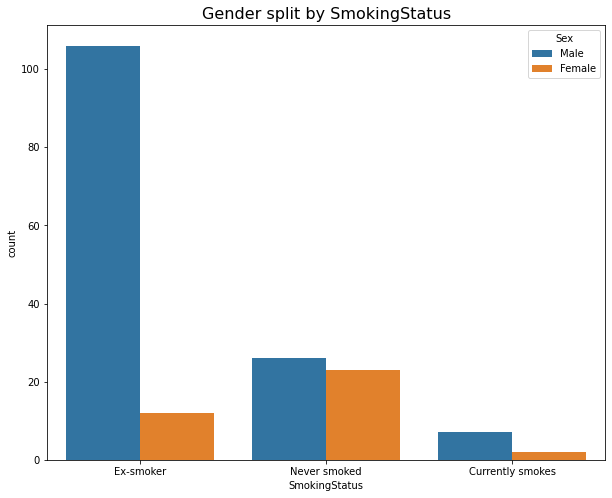

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='SmokingStatus', data=train_patient_dataframe, hue='Sex')
plt.title('Gender split by SmokingStatus', fontsize=16)
plt.show()

#### Distribution of Age vs Gender

- There are alot of older male patient compared to that of female patient

In [33]:
fig = go.Figure()
fig = px.scatter(train_patient_dataframe,x='Sex',y = 'Age',title = 'Relation between Age and Gender')
fig.show()

### Checking out the distribution of the data
- Mainly the gaussian distribution of the data
- The standard normal distribution has two parameters: the mean and the standard deviation. For a normal distribution, 68% of the observations are within +/- one standard deviation of the mean, 95% are within +/- two standard deviations, and 99.7% are within +- three standard deviations.
- The normal distribution model is motivated by the Central Limit Theorem. This theory states that averages calculated from independent, identically distributed random variables have approximately normal distributions, regardless of the type of distribution from which the variables are sampled (provided it has finite variance). 

##### Gaussian distribution of age and sexes in training data
- Almost same distribution of male and female age

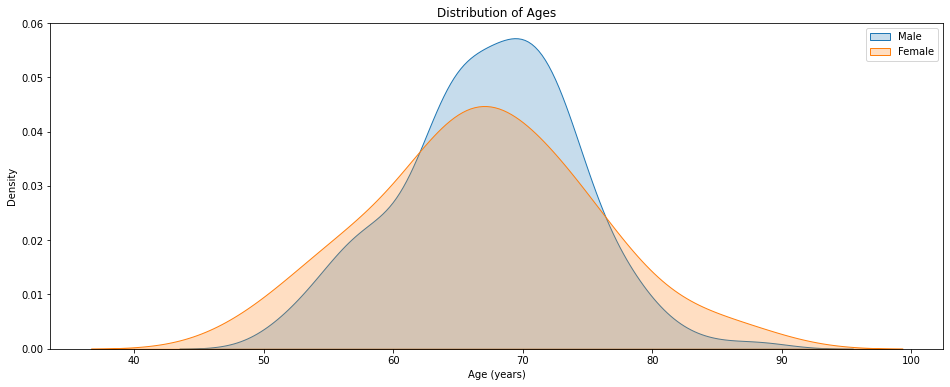

In [34]:
plt.figure(figsize=(16, 6))

sns.kdeplot(train_patient_dataframe[train_patient_dataframe['Sex'] == 'Male']['Age'], label = 'Male',shade=True)
sns.kdeplot(train_patient_dataframe[train_patient_dataframe['Sex'] == 'Female']['Age'], label = 'Female',shade=True)

plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');
plt.legend();
plt.show();

##### Gaussian Distribution of age and smokers in training data
- Smokers, non smokers and exsmokers has almost same age distribution

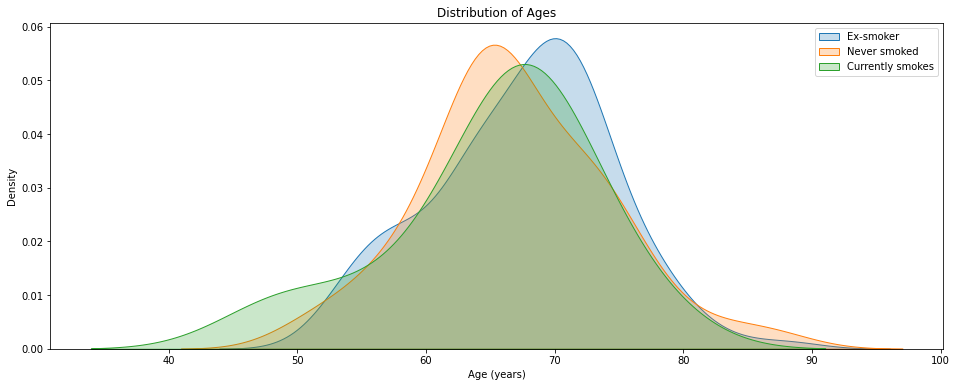

In [35]:
plt.figure(figsize=(16, 6))

sns.kdeplot(train_patient_dataframe.loc[train_patient_dataframe['SmokingStatus'] == 'Ex-smoker', 'Age'], label = 'Ex-smoker',shade=True)
sns.kdeplot(train_patient_dataframe.loc[train_patient_dataframe['SmokingStatus'] == 'Never smoked', 'Age'], label = 'Never smoked',shade=True)
sns.kdeplot(train_patient_dataframe.loc[train_patient_dataframe['SmokingStatus'] == 'Currently smokes', 'Age'], label = 'Currently smokes', shade=True)

# Labeling of plot
plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');
plt.legend();
plt.show();

### Deconstructing the FVC in detail
##### What is FVC?
- Forced expiratory volume (FEV) measures how much air a person can exhale during a forced breath. 
- The normal FVC range for an adult is between 3.0 and 5.0 L.
- The standard FVC for an average-size preschool boy is 1.16 L and 1.04 L for an average-size preschool girl.
###### Here however, the FVC are calculated in milliliters

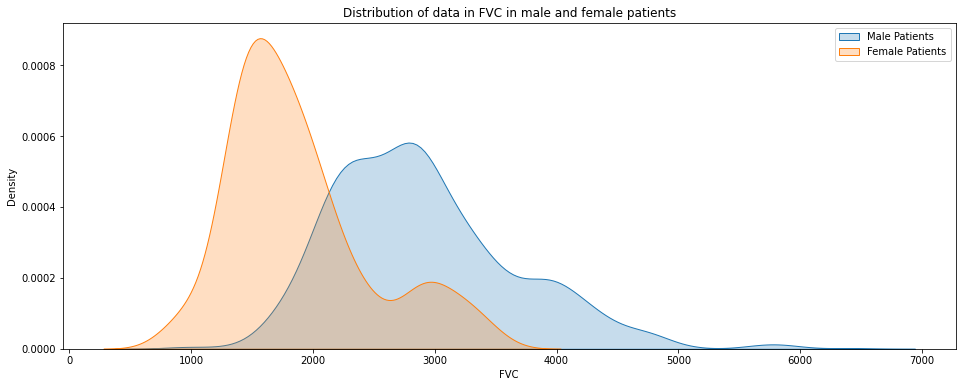

In [36]:
#Checking the distribution of FVC of both male and female patients
plt.figure(figsize=(16, 6))
sns.kdeplot(final_dataframe[final_dataframe['Sex'] == 'Male']['FVC'],label = 'Male Patients',shade=True)
sns.kdeplot(final_dataframe[final_dataframe['Sex'] == 'Female']['FVC'],label = 'Female Patients',shade=True)
plt.xlabel('FVC'); 
plt.ylabel('Density'); 
plt.title('Distribution of data in FVC in male and female patients');
plt.legend();
plt.show();

In [37]:
male = train_final_dataframe[train_final_dataframe['Sex']== 'Male']
female = train_final_dataframe[train_final_dataframe['Sex'] == 'Female']

#### Checking out the progress of each patients throughout the weeks
- Looks like most of the checkups are done between 0-60 weeks for male patients
- For female patients it is between 0-40 weeks

In [38]:
px.scatter(male,x ='Weeks',y = 'Patient',color = 'FVC')

In [39]:
px.scatter(female,x ='Weeks',y = 'Patient',color = 'FVC')

#### FVC vs Age

In [40]:
fig = px.scatter(final_dataframe, x="Age", y="FVC", color='Sex', title='FVC values for Patient Age')
fig.show()

## Working on DICOM images
- Go here to learn more about DICOM images in python : https://pydicom.github.io/pydicom/dev/reference/generated/pydicom.filereader.dcmread.html

In [41]:
def image_info(path):
    image_info = pydicom.dcmread(path)
    patient_name = image_info.PatientName
    thickness = image_info.SliceThickness
    image_type = image_info.Modality
    body_part = image_info.BodyPartExamined
    
    print('The patient name is :',patient_name)
    print('The thickness of the slide is: ',thickness)
    print('The image type is: ',image_type)
    print('The body part that was CT scanned:',body_part)
    
    if 'PixelData' in image_info:
        rows = int(image_info.Rows)
        cols = int(image_info.Columns)
        print('The dimension of the image is {rows:d}*{cols:d} and the size of image is: {size:d} bytes'.format(rows=rows,cols = cols,size = len(image_info.PixelData)))
        plt.figure(figsize=(10, 10))
        plt.imshow(image_info.pixel_array, cmap='gray')
        plt.show()

The patient name is : ID00007637202177411956430
The thickness of the slide is:  1.250000
The image type is:  CT
The body part that was CT scanned: Chest
The dimension of the image is 512*512 and the size of image is: 524288 bytes


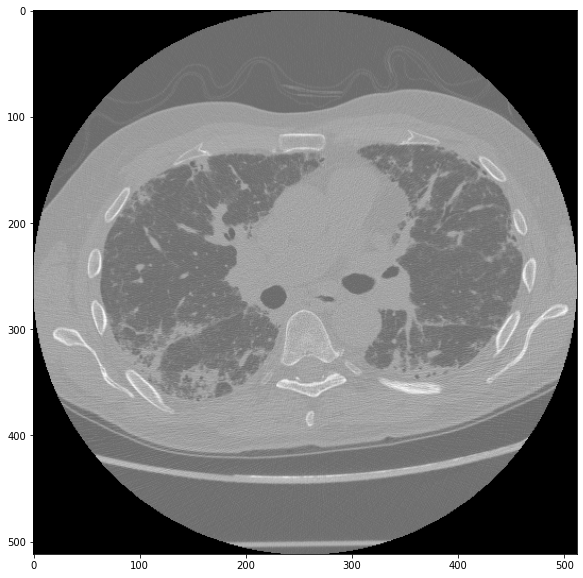

Dense tissues such as the bones appear white on a CT film while soft tissues such as the brain or liver appear gray. The cavities filled with air such as lungs appear black.


In [42]:
path = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train\ID00007637202177411956430\15.dcm'
image_info(path) #Applying the image_info function
print('Dense tissues such as the bones appear white on a CT film while soft tissues such as the brain or liver appear gray. The cavities filled with air such as lungs appear black.')

#### Converting each patient pictures into gifs
- Using imageio

In [43]:
#Function to convert group of images into gifs
def image_gif(patient_id):
    path = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'+'\\'+patient_id
    images = []
    for files in os.listdir(path):
        images.append((imageio.imread(path+'\\'+files,'DICOM')))
    imageio.mimsave(r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\patient_{}.gif'.format(patient_id), images,duration=0.1)
    return Image(r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\patient_{}.gif'.format(patient_id),format='png')

In [44]:
# path = 'ID00105637202208831864134' #Change patient ID to see the gifs
# image_gif(path)

### Plotting the CT scan images of a patient

In [45]:
def plot(directory):
    image_path = os.listdir(directory)
    fig = plt.figure(figsize=(15,15))
    cols = 6
    rows = 6
    for i in range(1,len(image_path)):
        filepath = directory+ '\\' + str(i) + '.dcm'
        image = pydicom.dcmread(filepath)
        fig.add_subplot(cols,rows,i)
        plt.imshow(image.pixel_array,cmap='gray')
plt.show()
        

### Plotting single patient's images

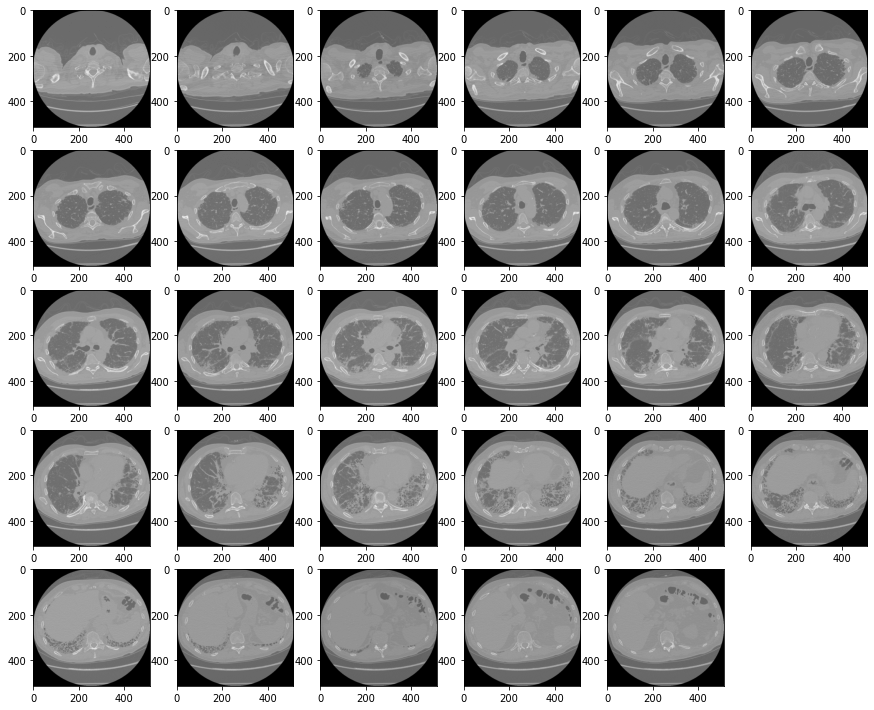

In [46]:
patient1 = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train\ID00007637202177411956430'
plot(patient1)

## Transforming to Hounsfield Unit
#### What is Hounsfield Unit?
- XRay attenuation unit used in CT Scan interpretation
- Characterizes the relative density of a substance (amount of X-ray radiation absorbed by each element in tissue)
- Each pixel is assigned a value between -1000 (air, black) to +3000 (dense bone, white) 

##### Imaging: Substance densities in Hounsfield Units (Radiodensity)
- Air: -1000
- Lung: -700
- Soft Tissue: -300 to -100
- Fat: -50
- Water: 0
- CSF: +15
- Blood: +30 to +45
- Muscle: +40
- Calculus: +100 to +400
- Bone: +1000 (up to +3000 for dense bone)

##### Formulae for converting into Hounsfield unit
- HU = Gray_Value * slope + intercept

##### Plotting hounsfield unit for some dicom images to check the threshold for lungs segmentation

In [47]:
#Let's create a hounsfield function
def hounsfield(data):
    image = pydicom.dcmread(data).pixel_array.flatten()
    hu_image = image*pydicom.dcmread(data).RescaleSlope + pydicom.dcmread(data).RescaleIntercept
    return hu_image

In [48]:
image_base = r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'
image_name = os.listdir(image_base)
all_folders = [] #Collecting all folders
hf_images = [] #Collection of images directory
for i in image_name:
    all_folders.append(image_base+'\\'+i)
for i in all_folders:
    hf_images.append(i+'\\'+os.listdir(i)[0])
#10 examples from hf_images
collection = hf_images[:10] #Collection of only 10 images

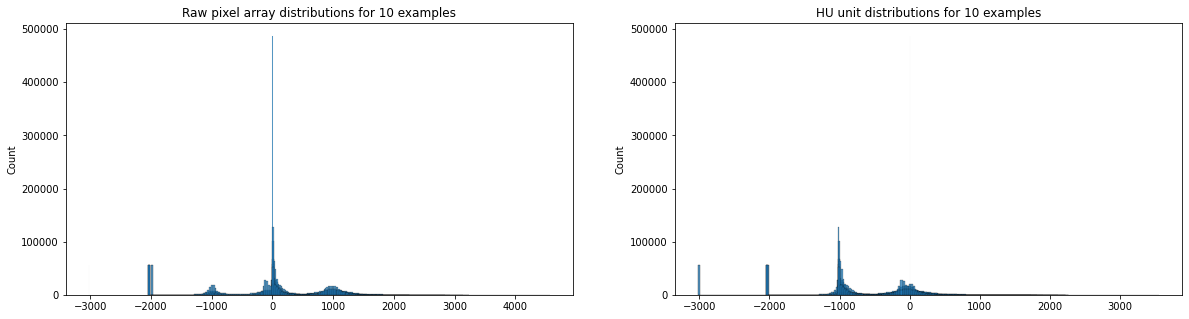

In [49]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
for i in collection:
    image = pydicom.dcmread(i).pixel_array.flatten() #Make sure you pip install gdcm and update pydicom
    hu_image = hounsfield(i) #The formulae to convert into hounsfield unit
    sns.histplot(image.flatten(), ax=ax[0]);
    sns.histplot(hu_image.flatten(), ax=ax[1])
ax[0].set_title("Raw pixel array distributions for 10 examples")
ax[1].set_title("HU unit distributions for 10 examples");

#### Analysis of above histogram
###### The original raw image

- 1000 meaning it consists alot of air
- Consists of alot of values in 0 which is water 
###### After converting it into hounsfield unit

- 1000 meaning it consists alot of air after converting it into hounsfield unit(much more than in the raw images)

#### There are values clustered in -2000. The value corresponds outside of the circle in the CT scan so let's create a boundary

In [50]:
#Let's first create a list with all the images stored in the directory
train_image_list = []
all_image_directory = os.listdir(r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train')
for i in all_image_directory:
    for j in os.listdir(r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'+'\\'+i):
        train_image_list.append(r'C:\Users\ghimi\Desktop\OSIC-Pulmonary-Fibrosis\brain\train'+'\\'+i+'\\'+j)

In [51]:
def set_scanner_to_air(raw_pixelarray):
    raw_pixelarray[raw_pixelarray <= -1000] = 0
    return raw_pixelarray

In [89]:
def converting_image_hu(image_slices):
    images = []
    for i in image_slices:
        read_image = pydicom.dcmread(i)
        images.append(read_image.pixel_array)
    images = np.stack(images)
    images = images.astype(np.int16)
    
    images = set_scanner_to_air(images) #Removing all the boundaries from the data using set_scanner_to_air function
    
    for i in range(len(image_slices)):
        intercept = image_slices[i].RescaleIntercept
        slope = image_slices[i].RescaleSlope
        
        if slope !=1:
            images[i] = slope * images[i].astype(np.float64)
            images[i] = images[i].astype(np.int16)
            
        images[i] += np.int16(intercept)
    
    return np.array(images, dtype=np.int16)

In [90]:
converting_image_hu(train_image_list)

ValueError: all input arrays must have the same shape